In [2]:
import sys
from pathlib import Path
if "../src" not in sys.path:
    sys.path.append("../src")

import matplotlib.pyplot as plt
import dietcoke
import random

random.seed(2021)

In [3]:
dic = {
    '先秦': [3,6], # ['管仲', [-725, -645]],  ['呂不韋', [-235]],
    '漢': [17,218], # ['賈誼', [-200, -168]],  ['班固', [32, 92]],
    '魏晉南北': [42,51], # ['嵇康', [223, 263]],  ['劉義慶', [403, 444]],
    '唐五代十國': [1,155], # ['魏徵', [580, 643]],  ['顏真卿', [709, 785]],
    '宋元': [4,416], # ['朱熹', [1130, 1200]],  ['趙孟頫', [1254, 1322]],
    '明': [279,183], # ['王守仁', [1472, 1529]],  ['馮夢龍', [1574, 1646]],
    '清': [377,1355,485], # ['蒲松齡', [1640, 1715]],  ['吳敬梓', [1701, 1754]],  ['劉鶚', [1857, 1909]],
    '民國': [0] # ['金毓黻', [1887, 1962]],
}

diachronic_texts = ''
for dynaspan, corpus in zip(dietcoke.dynaspan_lst, dietcoke.corpus_lst()):
    corpus.read_corpus()
    corpus = corpus.corpus
    for idx in dic[dynaspan]:
        try:
            text_data = dietcoke.Text(corpus[idx])
            text_data.clean()
            clean_text = ''.join(text_data.clean_texts)
            random_idx = random.randint(0, len(clean_text)-20001)
            print(text_data.obj['title'], text_data.obj['author'], random_idx)
            random_text = clean_text[random_idx:random_idx+20000]
            diachronic_texts += random_text
        except:
            pass

print(len(diachronic_texts))

100%|██████████| 8/8 [00:00<00:00, 6069.90it/s]


管子 舊題管仲 105960
呂氏春秋 呂不韋 142635
新書 賈誼 9067
嵇中散集 嵇康 8104
世說新語 劉義慶 115178
羣書治要 魏徵 332933
顏魯公文集 顏真卿 9086
詩經集傳 朱熹 116255
松雪齋集 趙孟頫 62100
王文成公全書 王守仁 301115
醒世恆言 馮夢龍 33418
聊齋志異 蒲松齡 164032
儒林外史 吳敬梓 141528
老殘遊記 劉鶚 38808
大元一統志 金毓黻 31131
300000


In [4]:
# texts = dietcoke.Text(corpus.corpus[0])
# texts.clean()
growth_obj = dietcoke.Growth(diachronic_texts, 1000)

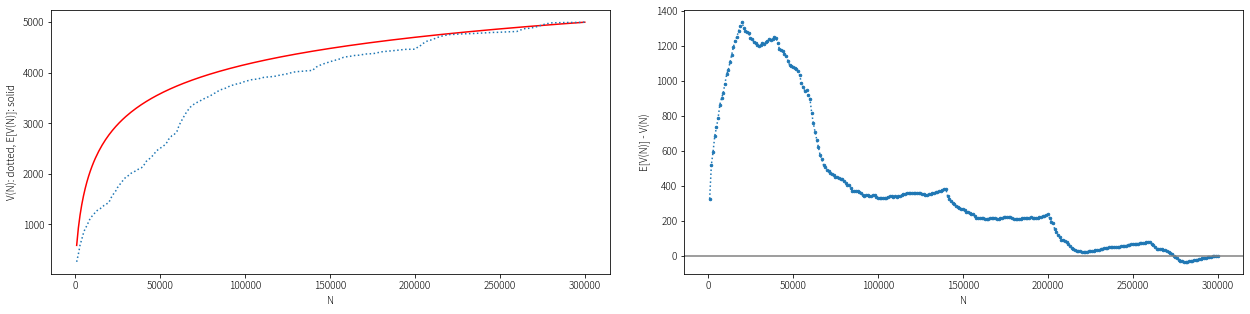

In [5]:
growth_obj.get_vgc()
growth_obj.plot_vgc(growth_obj.vgc_df, figsize=(18, 5))
# plt.suptitle(texts.obj['title'])
plt.show()

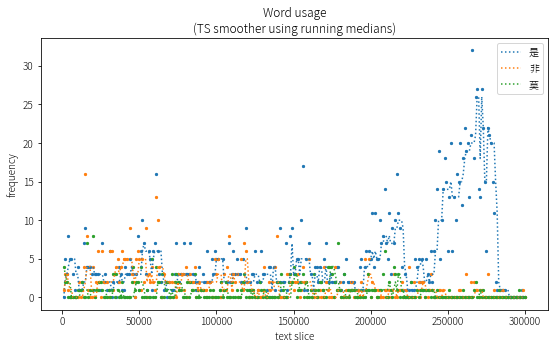

In [16]:
char_lst = '是 非 莫'.split(' ')
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
for char in char_lst:
    growth_obj.plot_char_freq_by_text_slice(char)
plt.legend(char_lst)
plt.title('Word usage\n(TS smoother using running medians)')
plt.show()

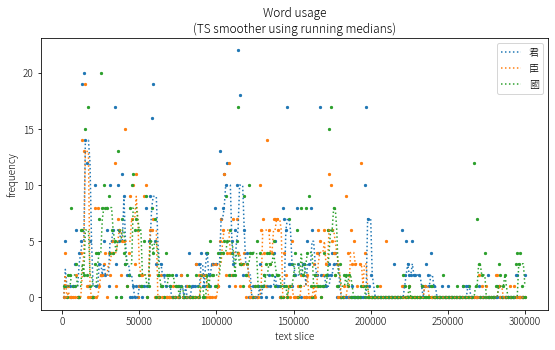

In [17]:
char_lst = '君 臣 國'.split(' ')
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
for char in char_lst:
    growth_obj.plot_char_freq_by_text_slice(char)
plt.legend(char_lst)
plt.title('Word usage\n(TS smoother using running medians)')
plt.show()

/Users/mac/Documents/GitHub/GIL/CCKF/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


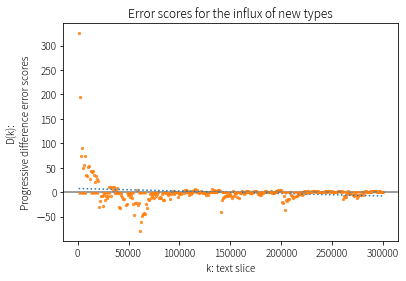

In [18]:
growth_obj.get_prog_err_scores_df()
growth_obj.plot_prog_err_scores(growth_obj.prog_err_scores_df)
plt.show()

In [8]:
growth_obj.get_underdisperse_df()
growth_obj.underdisperse_chars

array(['者', '夫', '之', '有', '時', '而', '則', '物', '也', '無', '皆', '不', '能',
       '自', '何', '若', '然', '使', '風', '見', '聽', '聞', '謂', '乎', '天', '下',
       '其', '於', '知', '往', '來', '莫', '得', '正', '問', '方', '為', '復', '門',
       '雖', '故', '口', '聲', '耳', '事', '所', '必', '今', '在', '非', '亦', '當',
       '生', '死', '主', '言', '西', '居', '至', '常', '立', '可', '人', '理', '道',
       '官', '如', '此', '以', '書', '上', '猶', '後', '命', '名', '德', '義', '內',
       '心', '外', '及', '令', '欲', '曰', '和', '矣', '與', '相', '善', '國', '將',
       '我', '又', '中', '日', '月', '處', '萬', '士', '歸', '同', '出', '重', '一',
       '長', '用', '王', '四', '請', '百', '地', '大', '小', '是', '子', '臣', '君',
       '前', '去', '還', '敢', '明', '行', '太', '身', '乃', '實', '進', '未', '家',
       '民', '先', '本', '從', '安', '定', '十', '三', '五', '諸', '好', '意', '多',
       '少', '平', '已', '成', '過', '山', '數', '文', '入', '世', '里', '八', '二',
       '南', '作', '因', '興', '且', '年', '起', '公', '州', '甚', '說', '間'],
      dtype=object)

In [9]:
for warring_state in '韓 趙 魏 楚 燕 齊 秦'.split(' '):
    print(f'Is {warring_state} underdispersed:', warring_state in growth_obj.underdisperse_chars)

Is 韓 underdispersed: False
Is 趙 underdispersed: False
Is 魏 underdispersed: False
Is 楚 underdispersed: False
Is 燕 underdispersed: False
Is 齊 underdispersed: False
Is 秦 underdispersed: False


100%|██████████| 168/168 [00:02<00:00, 71.07it/s]


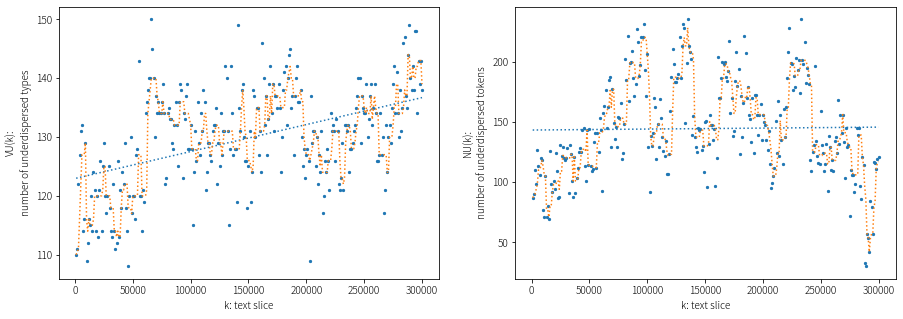

In [10]:
growth_obj.get_d_f_threshold()
growth_obj.get_U_df()

fig = plt.figure(figsize=(15, 5))
plt.figure(1)

plt.subplot(121)
growth_obj.plot_VU(growth_obj.U_df)

plt.subplot(122)
growth_obj.plot_NU(growth_obj.U_df)

plt.show()

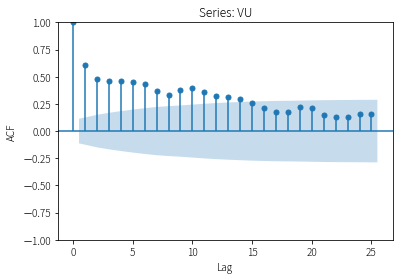

In [11]:
growth_obj.plot_VU_acf(growth_obj.U_df)

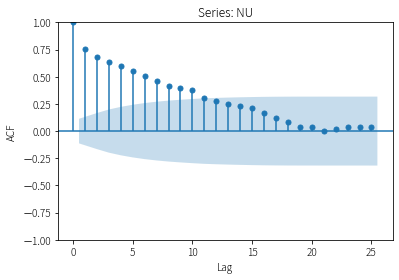

In [12]:
growth_obj.plot_NU_acf(growth_obj.U_df)

100%|██████████| 4996/4996 [01:19<00:00, 62.74it/s]


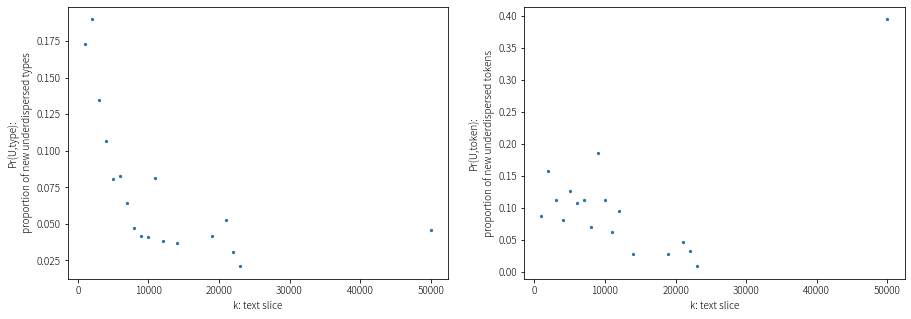

In [13]:
growth_obj.get_Pr_df()

fig = plt.figure(figsize=(15, 5))
plt.figure(1)

plt.subplot(121)
growth_obj.plot_Pr_type(growth_obj.Pr_abridf)

plt.subplot(122)
growth_obj.plot_Pr_token(growth_obj.Pr_abridf)

plt.show()

In [14]:
# D_k, DU_k, D_k - DU_k
# freq_k